# Settings

In [163]:
from pathlib import Path

import pandas as pd
pd.plotting.register_matplotlib_converters()
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [164]:
syntanic_data_path = Path(r'.\data\train.csv')
syntanic_data = pd.read_csv(syntanic_data_path, index_col='PassengerId')
syntanic_data['Embarked'].replace(
      {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'},
      inplace=True)
syntanic_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,Southampton
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,Southampton
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,Southampton
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,Southampton
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,Southampton
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,Southampton
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,Southampton
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,Southampton
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,Southampton


# Context

Здесь использован синтетический набор данных, но основан на реальных данных с Титаника.

В данных следующие колонки: ``` ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] ```, а ```'PassengerId'``` использован как индекс строки.

# Data quality assessment

Количество строк (пассажиров) в данных 100000


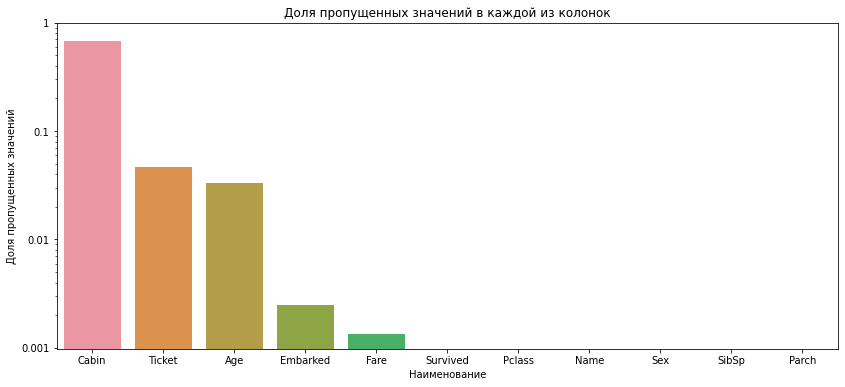

Среди колонок наибольшее количество пропущенных значений имеет номер кабины ('Cabin' = 67.87%), далее номер билета ('Ticket' = 4.62%) и возраст ('Age' = 3.29%), а наименьшее - порт назначения ('Embarked' = 0.25%) и тариф ('Fare' = 0.13%). В остальных колонках нет пропущенных значений.
При этом во всем датасете обнаружено 0 полностью пустых строк


In [165]:
total_rows = syntanic_data.shape[0]
print(f'Количество строк (пассажиров) в данных {syntanic_data.shape[0]}')

plt.figure(figsize=(14, 6))
plt.title('Доля пропущенных значений в каждой из колонок')

na_fraction = (syntanic_data.isna().sum() / total_rows).sort_values(ascending=False)
na_frac_fig = sb.barplot(x=na_fraction.index, y=na_fraction)
na_frac_fig.set(xlabel='Наименование', ylabel='Доля пропущенных значений')
na_frac_fig.set_yscale("log")
na_frac_fig.set_yticks([0.001, 0.01, 0.1, 1])
na_frac_fig.set_yticklabels([0.001, 0.01, 0.1, 1])
plt.show()

print('Среди колонок наибольшее количество пропущенных значений имеет '
      'номер кабины (\'Cabin\' = {:.2%}), далее номер билета '
      '(\'Ticket\' = {:.2%}) и возраст (\'Age\' = {:.2%}), '
      'а наименьшее - порт назначения (\'Embarked\' = {:.2%}) '
      'и тариф (\'Fare\' = {:.2%}). В остальных колонках '
      'нет пропущенных значений.'\
      .format(na_fraction['Cabin'], na_fraction['Ticket'], na_fraction['Age'],
              na_fraction['Embarked'], na_fraction['Fare']))
print('При этом во всем датасете обнаружено {:d} полностью пустых строк'\
      .format(total_rows - syntanic_data.dropna(how='all').shape[0]))

Датасет имеет 0 строк-дубликатов


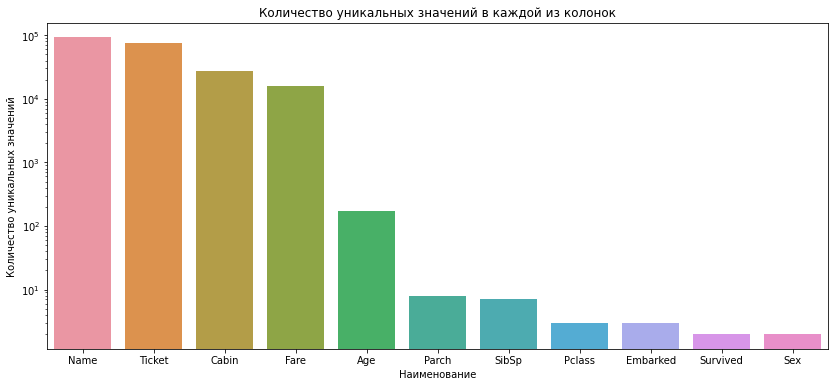

При расчете отсутвующие значения отбрасывались. Среди данных уникальных имен 92144, номеров билетов 75331 (самый часто встречающийся билет - 'A/5 ' (601 раз)), номеров кают 26992 (что логично, так как каюты бывают многоместные и также в этих данных больше всего отсутствующих значений)
Обычно подразумевается, что билет имеет уникальный номер. Поэтому делается предположение, что в этом поле много невалидных данных. В дальнейшем обработка может проводиться только по уникальным номерам билетов (о чем будет написано)


In [166]:
print('Датасет имеет {:d} строк-дубликатов'\
      .format(syntanic_data[syntanic_data.duplicated()].shape[0]))

plt.figure(figsize=(14, 6))
plt.title('Количество уникальных значений в каждой из колонок')

unique_values_count = syntanic_data.nunique(dropna=True).sort_values(ascending=False)
unique_vals_fig = sb.barplot(x=unique_values_count.index, y=unique_values_count)
unique_vals_fig.set(xlabel='Наименование', ylabel='Количество уникальных значений')
unique_vals_fig.set_yscale("log")
plt.show()

duplicated_tickets = syntanic_data['Ticket'].dropna()[syntanic_data['Ticket']\
      .dropna().duplicated()].value_counts()

print('При расчете отсутвующие значения отбрасывались. '
      'Среди данных уникальных имен {:d}, номеров билетов {:d} '
      '(самый часто встречающийся билет - \'{}\' ({:d} раз)), '
      'номеров кают {:d} (что логично, так как каюты бывают '
      'многоместные и также в этих данных больше всего '
      'отсутствующих значений)'\
      .format(unique_values_count['Name'], unique_values_count['Ticket'],
              duplicated_tickets.idxmax(), duplicated_tickets.max(),
              unique_values_count['Cabin']))

print('Обычно подразумевается, что билет имеет уникальный номер. Поэтому делается '
      'предположение, что в этом поле много невалидных данных. В дальнейшем обработка '
      'может проводиться только по уникальным номерам билетов (о чем будет написано)')

In [167]:
print('В ходе изучения данных выдвинуто предположение, '
      'что основной целью является выявление степени '
      'влияния различных параметров на вероятность выживания '
      'пассажира. Однако это не отбрасывает интерес к зависимостям  '
      'между другими параметрами')

В ходе изучения данных выдвинуто предположение, что основной целью является выявление степени влияния различных параметров на вероятность выживания пассажира. Однако это не отбрасывает интерес к зависимостям  между другими параметрами


# Data exploration

Сводка по пассажирам:
- Среди пассажиров 56.11% мужчин;
- 30.31% пассажиров 1 класса, 2 класса 28.68% пасс., 3 класса 41.01% пасс.
- Средняя цена за тариф составляет 43.93 (максимум 744.66), при этом распределение цены по классам


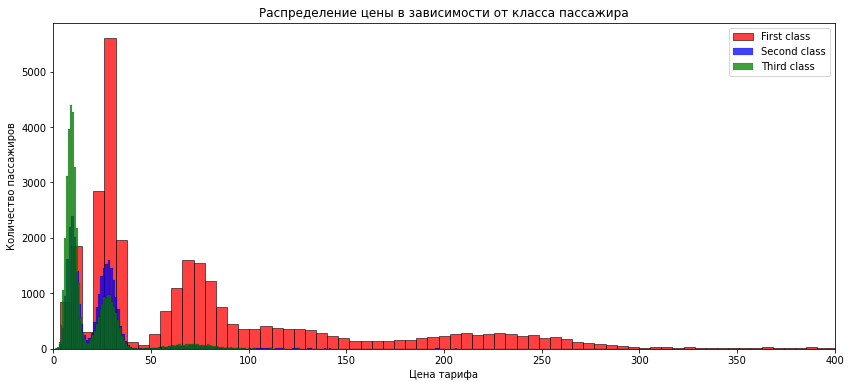

Самая частовстречаемий тариф среди пассажиров 1 класса около 29,2 класса - около 28, 3 класса - 9,5


In [186]:
print('Сводка по пассажирам:\n'
      '- Среди пассажиров {:.2%} мужчин;\n'
      '- {:.2%} пассажиров 1 класса, 2 класса {:.2%} пасс., 3 класса {:.2%} пасс.'\
      .format(
      syntanic_data[syntanic_data['Sex'] == 'male'].shape[0] / total_rows,
      syntanic_data[syntanic_data['Pclass'] == 1].shape[0] / total_rows,
      syntanic_data[syntanic_data['Pclass'] == 2].shape[0] / total_rows,
      syntanic_data[syntanic_data['Pclass'] == 3].shape[0] / total_rows
))

print('- Средняя цена за тариф составляет {:.2f} (максимум {:.2f}), '
      'при этом распределение цены по классам'\
      .format(syntanic_data['Fare'].mean(),
              syntanic_data['Fare'].max()
))

plt.figure(figsize=(14, 6))
plt.title('Распределение цены в зависимости от класса пассажира')

unique_values_count = syntanic_data.nunique(dropna=True).sort_values(ascending=False)
class_price_fig: plt.Axes = sb.histplot(
      data=syntanic_data[syntanic_data['Pclass'] == 1]['Fare'], label='First class',
      color='Red'
)
sb.histplot(
      data=syntanic_data[syntanic_data['Pclass'] == 2]['Fare'], label='Second class',
      color='Blue'
)
sb.histplot(
      data=syntanic_data[syntanic_data['Pclass'] == 3]['Fare'], label='Third class',
      color='Green'
)

class_price_fig.set(xlabel='Цена тарифа', ylabel='Количество пассажиров')
class_price_fig.set_xlim(0, 400)
plt.legend()
plt.show()

print(f'Самая частовстречаемый тариф среди пассажиров 1 класса около 29,'
      f'2 класса - около 28, 3 класса - 9,5')

In [ ]:
class_price_fig = sb.swarmplot(
      x='Pclass', y='Fare', hue='Embarked', s=1,
      data=syntanic_data[syntanic_data['Fare'].notna() & syntanic_data['Embarked'].notna()].head(1000)
)

# Summary